In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import modin.pandas as md
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", ".*defaulting to pandas implementation.*")
notebook_dir = str(Path().resolve())
h5_path = os.path.join(notebook_dir,'alphaVantage vanillas.h5')
store = pd.HDFStore(h5_path)
store.close()

In [2]:
from historical_av_key_collector import keys_df

                            contract_key               raw_data_key  \
0     /date_2024_10_09/hottest_contracts  /date_2024_10_09/raw_data   
1     /date_2024_10_08/hottest_contracts  /date_2024_10_08/raw_data   
2     /date_2024_10_07/hottest_contracts  /date_2024_10_07/raw_data   
3     /date_2024_10_04/hottest_contracts  /date_2024_10_04/raw_data   
4     /date_2024_10_03/hottest_contracts  /date_2024_10_03/raw_data   
...                                  ...                        ...   
4195  /date_2008_01_08/hottest_contracts  /date_2008_01_08/raw_data   
4196  /date_2008_01_07/hottest_contracts  /date_2008_01_07/raw_data   
4197  /date_2008_01_04/hottest_contracts  /date_2008_01_04/raw_data   
4198  /date_2008_01_03/hottest_contracts  /date_2008_01_03/raw_data   
4199  /date_2008_01_02/hottest_contracts  /date_2008_01_02/raw_data   

                   surface_key               calibration_key  \
0     /date_2024_10_09/surface  /date_2024_10_09/calibration   
1     /date_2024_10

# calibrations

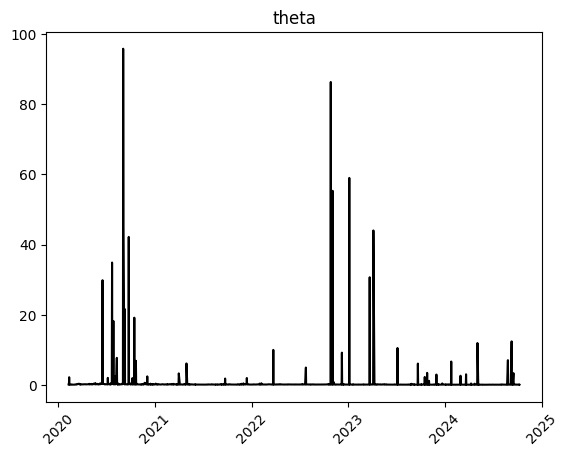

<Figure size 640x480 with 0 Axes>

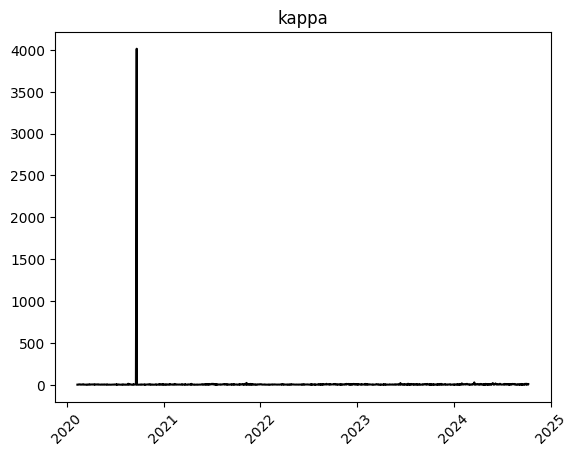

<Figure size 640x480 with 0 Axes>

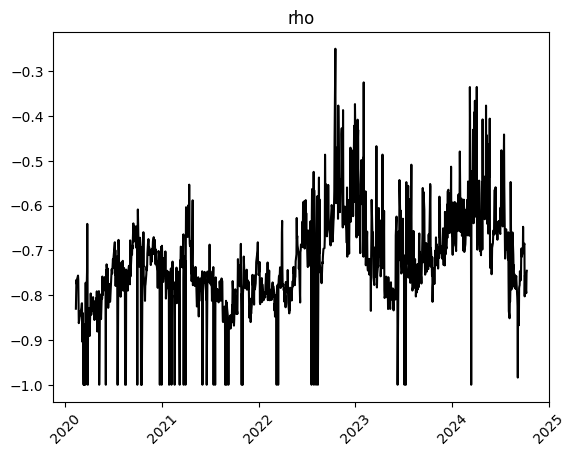

<Figure size 640x480 with 0 Axes>

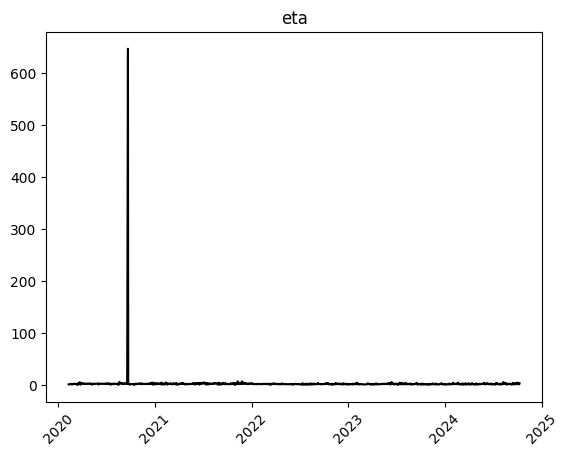

<Figure size 640x480 with 0 Axes>

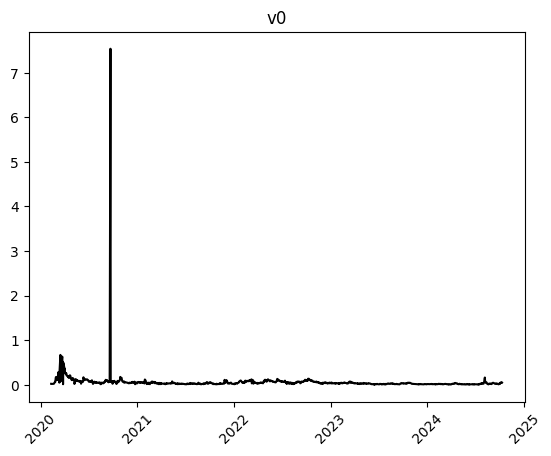

<Figure size 640x480 with 0 Axes>

In [5]:
calibration_keys = keys_df.copy().dropna(subset='calibration_key')
calibations = []
while True:
    try:
        store.open()
        for i,row in calibration_keys.iterrows():
            calibations.append(store[row['calibration_key']])
        break
    except Exception as e:
        print(e)
        print('retrying in...')
        for i in range(2):
            print(2-i)
            time.sleep(1)
    finally:
        store.close()

calibations = pd.concat(calibations,ignore_index=True)[['calculation_date','theta','kappa','rho','eta','v0']].drop_duplicates().reset_index(drop=True)
calibations['calculation_date'] = pd.to_datetime(calibations['calculation_date'],format='%Y-%m-%d')
calibations = calibations.set_index('calculation_date')
for col in calibations.columns:
    plt.figure()
    plt.plot(calibations[col], color='black')
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    plt.clf()

# computed prices

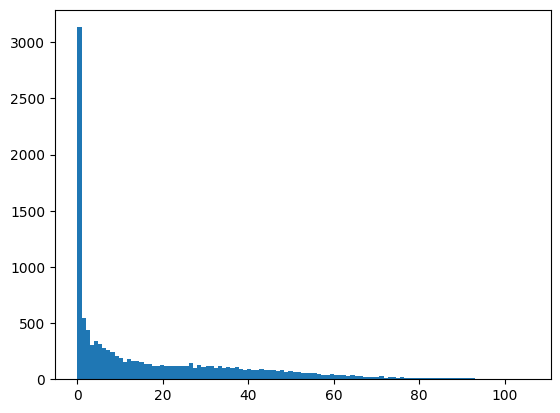

<Figure size 640x480 with 0 Axes>

In [7]:
prices_keys = keys_df.copy().dropna(subset='priced_securities_key')
while True:
    try:
        store.open()
        for i,row in prices_keys.iterrows():
            prices = store[row['priced_securities_key']]
        break
    except Exception as e:
        print(e)
        print('retrying in...')
        for i in range(2):
            print(2-i)
            time.sleep(1)
    finally:
        store.close()
plt.figure()
plt.hist(prices['barrier_price'],bins=int(prices.shape[0]**0.5))
plt.show()
plt.clf()

In [9]:
prices.dtypes

spot_price           float64
strike_price         float64
barrier              float64
days_to_maturity       int64
updown                object
outin                 object
w                     object
barrier_type_name     object
rebate               float64
dividend_rate        float64
risk_free_rate       float64
theta                float64
kappa                float64
rho                  float64
eta                  float64
v0                   float64
calculation_date      object
expiration_date       object
heston_vanilla       float64
barrier_price        float64
dtype: object

In [13]:
W = prices['w'].unique().tolist()
btypes = prices['barrier_type_name'].unique().tolist()
T = prices['days_to_maturity'].unique().tolist()
pricesby_wbt = prices.set_index(['w','barrier_type_name','days_to_maturity'])
pricesby_wbt

,,,spot_price,strike_price,barrier,updown,outin,rebate,dividend_rate,risk_free_rate,theta,kappa,rho,eta,v0,calculation_date,expiration_date,heston_vanilla,barrier_price
w,barrier_type_name,days_to_maturity,,,,,,,,,,,,,,,,,
call,DownOut,60,567.8,511.02,283.9,Down,Out,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2024-12-06,64.073924,64.071948
put,DownOut,60,567.8,511.02,283.9,Down,Out,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2024-12-06,5.622398,5.072605
call,DownIn,60,567.8,511.02,283.9,Down,In,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2024-12-06,64.073924,0.019154
put,DownIn,60,567.8,511.02,283.9,Down,In,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2024-12-06,5.622398,0.530724
call,DownOut,90,567.8,511.02,283.9,Down,Out,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2025-01-05,67.022931,67.012760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
put,UpIn,540,567.8,624.58,851.7,Up,In,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2026-03-31,61.190128,0.186789
call,UpOut,720,567.8,624.58,851.7,Up,Out,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2026-09-27,36.579809,32.693566
put,UpOut,720,567.8,624.58,851.7,Up,Out,0.0,0.018,0.04,0.054635,3.032096,-0.795491,1.709606,0.051083,2024-10-07,2026-09-27,65.779074,65.462478
